# Text Analysis using NLTK

In [1]:
!pip install NLTK

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenization

### Sentence tokenization

In [3]:
from nltk.tokenize import sent_tokenize,word_tokenize
text="""With modern-day cities come new
forms of data. Yet, in order to extract
meaningful information from these data,
it requires professionals to adopt new skills.
In this course, we aim to train professionals
towards leveraging the full potential of urban
 data in working on city challenges"""

tokenized_sentence=sent_tokenize(text)
print(tokenized_sentence)

['With modern-day cities come new\nforms of data.', 'Yet, in order to extract\nmeaningful information from these data,\nit requires professionals to adopt new skills.', 'In this course, we aim to train professionals\ntowards leveraging the full potential of urban\n data in working on city challenges']


### Word Tokenization

In [4]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['With', 'modern-day', 'cities', 'come', 'new', 'forms', 'of', 'data', '.', 'Yet', ',', 'in', 'order', 'to', 'extract', 'meaningful', 'information', 'from', 'these', 'data', ',', 'it', 'requires', 'professionals', 'to', 'adopt', 'new', 'skills', '.', 'In', 'this', 'course', ',', 'we', 'aim', 'to', 'train', 'professionals', 'towards', 'leveraging', 'the', 'full', 'potential', 'of', 'urban', 'data', 'in', 'working', 'on', 'city', 'challenges']


### Frequency Distribution

[('data', 3), (',', 3), ('to', 3)]


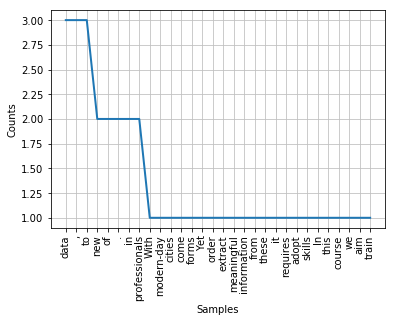

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist.most_common(3))
fdist.plot(30,cumulative=False)
plt.show()

## Remove Stopwords

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))


filtered_word=[]
for w in tokenized_word:
    if w.lower() not in stop_words:
        filtered_word.append(w)

print(filtered_word)
fdist = FreqDist(filtered_word)
print(fdist.most_common(3))

['modern-day', 'cities', 'come', 'new', 'forms', 'data', '.', 'Yet', ',', 'order', 'extract', 'meaningful', 'information', 'data', ',', 'requires', 'professionals', 'adopt', 'new', 'skills', '.', 'course', ',', 'aim', 'train', 'professionals', 'towards', 'leveraging', 'full', 'potential', 'urban', 'data', 'working', 'city', 'challenges']
[('data', 3), (',', 3), ('new', 2)]


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lexicon Normalization

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))



Lemmatized Word: fly
Stemmed Word: fli


## Part-of-Speech(POS) tagging

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [12]:
tags=nltk.pos_tag(tokens)
print(tags)

[('Albert', 'NNP'), ('Einstein', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Ulm', 'NNP'), (',', ','), ('Germany', 'NNP'), ('in', 'IN'), ('1879', 'CD'), ('.', '.')]


# Summary text statistics

In [13]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS  #For word cloud generation
import matplotlib.pyplot as plt             #For displaying figures
import re  #regural expression

    100% |████████████████████████████████| 368kB 3.6MB/s ta 0:00:011  19% |██████▍                         | 71kB 5.2MB/s eta 0:00:01


For people who still don't know, our concept is very simple; no commercial (pop)crap, no (repeating) old news, no annoying commercials and no farting DJ's ;-)
🤑
Following me is no obligation nor necessity. If you mess with my tweets - instant ban w/o warning. This is your only warning. ONLY TO BE USED AS-TWEETED.
a friend´s friend
Amateur weerstation te Krommenie
Summary statistics of input text:
Wordcount:  65
Number of characters:  365


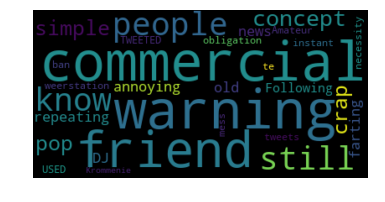

In [21]:
import json
data_path='twitter_data.json'
STOPWORDS.add('Amsterdam')
with open(data_path) as data_file:    
    data = json.load(data_file)
inputtext=[]
for i in range(0,len(data['statuses'])):
    inputtext.append(data['statuses'][i]['user']['description'])
    #print(data['statuses'][i]['user']['location'])
    print(data['statuses'][i]['user']['description'])
print("Summary statistics of input text:")
inputtext=' '.join(inputtext)
wordcount = len(re.findall(r'\w+', inputtext))
print("Wordcount: ", wordcount)

charcount = len(inputtext) #including spaces
print("Number of characters: ", charcount)

#More options for wordclouds here: https://github.com/amueller/word_cloud
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(inputtext)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()